In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Charging the dataset
df = pd.read_csv("BitcoinHeistData.csv")

In [6]:
df.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,princetonLocky


In [7]:
#Dataset columns
df.columns

Index(['address', 'year', 'day', 'length', 'weight', 'count', 'looped',
       'neighbors', 'income', 'label'],
      dtype='object')

In [8]:
#Dimensions of the dataset
df.shape

(2916697, 10)

In [9]:
#Target column
df.label

0          princetonCerber
1           princetonLocky
2          princetonCerber
3          princetonCerber
4           princetonLocky
                ...       
2916692              white
2916693              white
2916694              white
2916695              white
2916696              white
Name: label, Length: 2916697, dtype: object

In [10]:
#All our target values
df["label"].unique()

array(['princetonCerber', 'princetonLocky', 'montrealCryptoLocker',
       'montrealCryptXXX', 'paduaCryptoWall', 'montrealWannaCry',
       'montrealDMALockerv3', 'montrealCryptoTorLocker2015',
       'montrealSamSam', 'montrealFlyper', 'montrealNoobCrypt',
       'montrealDMALocker', 'montrealGlobe', 'montrealEDA2',
       'paduaKeRanger', 'montrealVenusLocker', 'montrealXTPLocker',
       'paduaJigsaw', 'montrealGlobev3', 'montrealJigSaw',
       'montrealXLockerv5.0', 'montrealXLocker', 'montrealRazy',
       'montrealCryptConsole', 'montrealGlobeImposter', 'montrealSam',
       'montrealComradeCircle', 'montrealAPT', 'white'], dtype=object)

In [12]:
#Dataset description
df.describe()

,year,day,length,weight,count,looped,neighbors,income
count,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06
mean,2.014475e+03,1.814572e+02,4.500859e+01,5.455192e-01,7.216446e+02,2.385067e+02,2.206516e+00,4.464889e+09
std,2.257398e+00,1.040118e+02,5.898236e+01,3.674255e+00,1.689676e+03,9.663217e+02,1.791877e+01,1.626860e+11
min,2.011000e+03,1.000000e+00,0.000000e+00,3.606469e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,2.013000e+03,9.200000e+01,2.000000e+00,2.148438e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.428559e+07
50%,2.014000e+03,1.810000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,1.999985e+08
75%,2.016000e+03,2.710000e+02,1.080000e+02,8.819482e-01,5.600000e+01,0.000000e+00,2.000000e+00,9.940000e+08
max,2.018000e+03,3.650000e+02,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.996440e+13


In [13]:
#We store categorical columns in categorical_cols(variable)
categorical_cols=df.select_dtypes(include="object").columns

In [14]:
#Categorical columns
categorical_cols

Index(['address', 'label'], dtype='object')

In [15]:
#We store numerical columns in numerical_cols(variable)
numerical_cols=df.select_dtypes(include="number").columns

In [16]:
#Numerical columns
numerical_cols

Index(['year', 'day', 'length', 'weight', 'count', 'looped', 'neighbors',
       'income'],
      dtype='object')

In [17]:
#The dataset has very low amount of null values
df.isnull().sum()

address      0
year         0
day          0
length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
dtype: int64

In [18]:
#The dataset has only one line with null values
df[df.isnull().any(axis=1)]

,address,year,day,length,weight,count,looped,neighbors,income,label


In [19]:
#Deleting null values
df.dropna(inplace = True)

In [20]:
#Deleting useless columns
df.drop(columns=["address","year","day"],axis=1,inplace=True)

In [21]:
# Extracting features (X) and labels (y)
# X contains all columns except the "label" column (features)
X = df.drop(columns=["label"])

# y contains only the "label" column (target)
y = df["label"]

In [22]:
#Features
X.columns

Index(['length', 'weight', 'count', 'looped', 'neighbors', 'income'], dtype='object')

In [23]:
#Target values
y.unique()

array(['princetonCerber', 'princetonLocky', 'montrealCryptoLocker',
       'montrealCryptXXX', 'paduaCryptoWall', 'montrealWannaCry',
       'montrealDMALockerv3', 'montrealCryptoTorLocker2015',
       'montrealSamSam', 'montrealFlyper', 'montrealNoobCrypt',
       'montrealDMALocker', 'montrealGlobe', 'montrealEDA2',
       'paduaKeRanger', 'montrealVenusLocker', 'montrealXTPLocker',
       'paduaJigsaw', 'montrealGlobev3', 'montrealJigSaw',
       'montrealXLockerv5.0', 'montrealXLocker', 'montrealRazy',
       'montrealCryptConsole', 'montrealGlobeImposter', 'montrealSam',
       'montrealComradeCircle', 'montrealAPT', 'white'], dtype=object)

In [11]:
# Calculating the amount of each unique label in the 'label' column
df["label"].value_counts()

white                          2875284
paduaCryptoWall                  12390
montrealCryptoLocker              9315
princetonCerber                   9223
princetonLocky                    6625
montrealCryptXXX                  2419
montrealNoobCrypt                  483
montrealDMALockerv3                354
montrealDMALocker                  251
montrealSamSam                      62
montrealCryptoTorLocker2015         55
montrealGlobeImposter               55
montrealGlobev3                     34
montrealGlobe                       32
montrealWannaCry                    28
montrealRazy                        13
montrealAPT                         11
paduaKeRanger                       10
montrealFlyper                       9
montrealXTPLocker                    8
montrealXLockerv5.0                  7
montrealVenusLocker                  7
montrealCryptConsole                 7
montrealEDA2                         6
montrealJigSaw                       4
paduaJigsaw              

as we can see here the label white has 2875284.. which will definitely influence our data .. we dont want that so we will try to remove some of the data that has white as a label to make as balanced as we can.

# Dataset enhancement

In this section, our goal is to balance the number of rows having the label **'white'** with the number of rows having a different **label**. This adjustment aims to address the significant disparity in the quantity of data labeled as 'white' compared to the other labels.

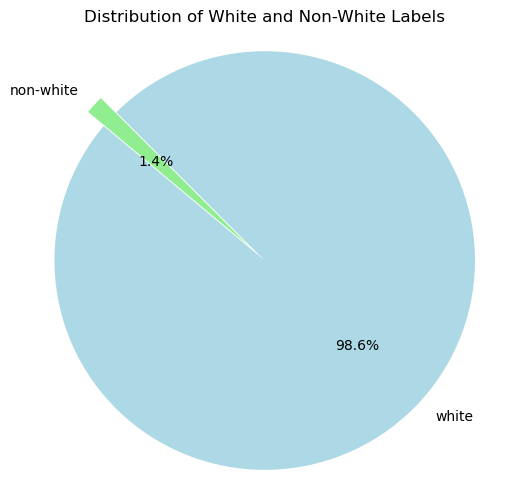

In [24]:
# Calculate the counts of unique labels in the 'label' column
label_counts = df['label'].value_counts()

# Extract the counts for 'white' and other labels
white_count = label_counts.get('white', 0)
non_white_count = label_counts.sum() - white_count

# Data for the pie chart
labels = ['white', 'non-white']
sizes = [white_count, non_white_count]
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # Explode the 'white' slice slightly

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of White and Non-White Labels')

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


The pie chart illustrates a significant contrast among the categories.

In [25]:
# Filter rows where the label is not 'white' to create a subset called 'black_rows'
black_rows = df[df["label"] != "white"]
black_rows

,length,weight,count,looped,neighbors,income,label
0,18,0.008333,1,0,2,1.000500e+08,princetonCerber
1,44,0.000244,1,0,1,1.000000e+08,princetonLocky
2,0,1.000000,1,0,2,2.000000e+08,princetonCerber
3,72,0.003906,1,0,2,7.120000e+07,princetonCerber
4,144,0.072848,456,0,1,2.000000e+08,princetonLocky
...,...,...,...,...,...,...,...
41408,144,1.375002,8076,8073,6,5.726876e+08,montrealAPT
41409,2,1.500000,2,0,2,7.449526e+07,montrealAPT
41410,0,0.500000,1,0,2,5.714286e+07,montrealAPT
41411,6,0.125000,1,0,2,1.000000e+08,montrealAPT


In [26]:
# Filter rows where the label is 'white' to create a subset called 'white_sample'
white_sample = df[df["label"] == "white"]


In [27]:
# Concatenate rows from 'black_rows' with a subset of rows from 'white_sample' to create 'sampled_df'

# Select a subset of 'white_sample' with the same length as 'black_rows'
subset_white_sample = white_sample.iloc[:len(black_rows), :]

# Concatenate 'black_rows' with the selected subset of 'white_sample'
concatenated_df = pd.concat([black_rows, subset_white_sample])

# Shuffle the concatenated DataFrame to create a random sample
# 'frac=1' retains all rows and 'random_state=50' provides reproducibility of results
sampled_df = concatenated_df.sample(frac=1, random_state=50)

# Display the first few rows of the sampled DataFrame
sampled_df.head()

,length,weight,count,looped,neighbors,income,label
2358,14,0.007812,1,0,2,2.440000e+08,montrealCryptoLocker
17227,2,0.750000,1,1,2,6.500000e+08,princetonLocky
63989,14,0.007812,1,0,2,4.089000e+09,white
68530,2,1.000000,1,0,2,4.965000e+09,white
16594,8,0.125000,1,0,2,2.700000e+08,princetonCerber


In [28]:
# Display the shape (number of rows and columns) of the DataFrame 'sampled_df'
print(sampled_df.shape)

(82826, 7)


In [29]:
#Displaying the new dataset
sampled_df

,length,weight,count,looped,neighbors,income,label
2358,14,0.007812,1,0,2,2.440000e+08,montrealCryptoLocker
17227,2,0.750000,1,1,2,6.500000e+08,princetonLocky
63989,14,0.007812,1,0,2,4.089000e+09,white
68530,2,1.000000,1,0,2,4.965000e+09,white
16594,8,0.125000,1,0,2,2.700000e+08,princetonCerber
...,...,...,...,...,...,...,...
55366,0,0.500000,1,0,2,1.000000e+08,white
59358,8,1.000000,1,0,2,4.991000e+09,white
48417,60,0.004151,3,0,2,9.200000e+07,white
22637,8,0.500000,1,0,1,1.907611e+08,paduaCryptoWall


In [33]:
sampled_df.to_csv("Cleaned_data.csv", index=False)

In [34]:
df = pd.read_csv("Cleaned_data.csv")

In [35]:
df.head()

,length,weight,count,looped,neighbors,income,label
0,14,0.007812,1,0,2,2.440000e+08,montrealCryptoLocker
1,2,0.750000,1,1,2,6.500000e+08,princetonLocky
2,14,0.007812,1,0,2,4.089000e+09,white
3,2,1.000000,1,0,2,4.965000e+09,white
4,8,0.125000,1,0,2,2.700000e+08,princetonCerber


In [37]:
df.shape

(82826, 7)

ok now that our data has 82826 rows and not almost 3 million as before we can work with it .

### Model Performance Analysis

#### **1. Logistic Regression:**
   - **Accuracy:** 80.21%
   - **Precision:** 81.59%
   - **Recall:** 80.21%
   - **F1 Score:** 80.00%
   - Despite a balanced precision and recall, the model leans toward predicting the negative class, showing limitations in handling positive cases.

#### **2. Support Vector Machine:**
   - **Accuracy:** 78.69%
   - **Precision:** 79.15%
   - **Recall:** 78.69%
   - **F1 Score:** 78.62%
   - Exhibits balanced performance with a notable overall accuracy, precision, recall, and F1 score.

#### **3. K-Nearest Neighbors:**
   - **Accuracy:** 84.28%
   - **Precision:** 84.36%
   - **Recall:** 84.28%
   - **F1 Score:** 84.27%
   - Shows outstanding performance, excelling in accuracy, precision, recall, and F1 score.

#### **4. Gradient Boosting:**
   - **Accuracy:** 87.71%
   - **Precision:** 87.87%
   - **Recall:** 87.71%
   - **F1 Score:** 87.70%
   - Demonstrates high accuracy, precision, recall, and F1 score, comparable to other top-performing models.

#### **5. XGBoost:**
   - **Accuracy:** 88.44%
   - **Precision:** 88.52%
   - **Recall:** 88.44%
   - **F1 Score:** 88.43%
   - Achieves top-tier performance, closely aligning with Gradient Boosting.

#### **6. Random Forest:**
   - **Accuracy:** 88.31%
   - **Precision:** 88.42%
   - **Recall:** 88.31%
   - **F1 Score:** 88.30%
   - Maintains high accuracy, precision, recall, and F1 score, akin to Gradient Boosting and XGBoost.

### Overall Model Insights:
- K-Nearest Neighbors, Gradient Boosting, XGBoost, and Random Forest exhibit exceptional performance across all metrics.
- Support Vector Machine demonstrates solid overall performance.
- Logistic Regression stands out as the weakest performer, particularly in handling positive cases.

### Confusion Matrices:
- **Logistic Regression:**
  - True Negative: 9619, False Positive: 4126
  - False Negative: 1284, True Positive: 12304

- **Support Vector Machine:**
  - True Negative: 9995, False Positive: 3750
  - False Negative: 2074, True Positive: 11514

- **K-Nearest Neighbors:**
  - True Negative: 11270, False Positive: 2475
  - False Negative: 1822, True Positive: 11766

- **Gradient Boosting:**
  - True Negative: 11778, False Positive: 1967
  - False Negative: 1229, True Positive: 12359

- **XGBoost:**
  - True Negative: 11625, False Positive: 2120
  - False Negative: 1240, True Positive: 12348

- **Random Forest:**
  - True Negative: 11853, False Positive: 1892
  - False Negative: 1269, True Positive: 12319